In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = 'TxyWW0OfU7JDHztPnkeT4NArn'
consumerSecret  = 'LDXxiLyXxNyzfy9OW2jwQ0mNugFkWrR6rDbH4RuSigcwnUz1Zf'
accessToken  = '459915333-L6q9tcF6ZwTqopLbsZVCISERWB8Dde7UDIseyOUg'

accessTokenSecret  = 'DIIKKtys3rC4GTEQgtbYUc3U90SAp16B77NVs7jmMOPCj'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [11]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="Dilsrivastava", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @IndiaHistorypic: 1960s :: Dr. C.V.Raman Teaching Diffraction

( Photo - @uwmlibraries ) https://t.co/fl4KsSkxcs

2) RT @smitaprakash: No limit to the number of fake news tweets she makes. Photo from WhatsApp University is pedalled as news. News websites w…

3) RT @AshokShrivasta6: ये पुलिसवाला है या कसाई। इसके खिलाफ कार्रवाई होनी ही चाहिए।

4) RT @Ach_Balkrishna: T-1 वाह रे, #IMA के विद्वान #डॉक्टर और #वैज्ञानिकों ! 
आपको प्रमाण एवं अनुसंधान आधारित आयुर्वेदिक औषधियां एवं प्राचीन #…

5) RT @yogrishiramdev: मैं इंडियन मेडिकल एसोसिएशन व फार्मा कंपनियों से विनम्रता के साथ सीधे 25 सवाल पूछता हूँ- https://t.co/ATVKlDc9tl



In [12]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @IndiaHistorypic: 1960s :: Dr. C.V.Raman Te...
1,RT @smitaprakash: No limit to the number of fa...
2,RT @AshokShrivasta6: ये पुलिसवाला है या कसाई। ...
3,"RT @Ach_Balkrishna: T-1 वाह रे, #IMA के विद्वा..."
4,RT @yogrishiramdev: मैं इंडियन मेडिकल एसोसिएशन...


In [13]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,: 1960s :: Dr. C.V.Raman Teaching Diffraction\...
1,: No limit to the number of fake news tweets s...
2,6: ये पुलिसवाला है या कसाई। इसके खिलाफ कार्रवा...
3,"_Balkrishna: T-1 वाह रे, IMA के विद्वान डॉक्टर..."
4,: मैं इंडियन मेडिकल एसोसिएशन व फार्मा कंपनियों...
...,...
95,बहुत बहुत आभार सर🙏🙏
96,: मधुर मनोहर अतीव सुंदर\nयह सर्व विद्या की राज...
97,: With new DRDO BHU COVID center going to be o...
98,: Bengal Violence is a blot on the country's d...


In [14]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,: 1960s :: Dr. C.V.Raman Teaching Diffraction\...,0.000000,0.000000
1,: No limit to the number of fake news tweets s...,1.000000,-0.500000
2,6: ये पुलिसवाला है या कसाई। इसके खिलाफ कार्रवा...,0.000000,0.000000
3,"_Balkrishna: T-1 वाह रे, IMA के विद्वान डॉक्टर...",0.000000,0.000000
4,: मैं इंडियन मेडिकल एसोसिएशन व फार्मा कंपनियों...,0.000000,0.000000
...,...,...,...
95,बहुत बहुत आभार सर🙏🙏,0.000000,0.000000
96,: मधुर मनोहर अतीव सुंदर\nयह सर्व विद्या की राज...,0.000000,0.000000
97,: With new DRDO BHU COVID center going to be o...,0.410909,0.167273
98,: Bengal Violence is a blot on the country's d...,0.550000,0.250000


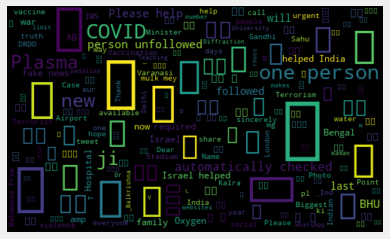

In [15]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: 1960s :: Dr. C.V.Raman Teaching Diffraction\...,0.000000,0.000000,Neutral
1,: No limit to the number of fake news tweets s...,1.000000,-0.500000,Negative
2,6: ये पुलिसवाला है या कसाई। इसके खिलाफ कार्रवा...,0.000000,0.000000,Neutral
3,"_Balkrishna: T-1 वाह रे, IMA के विद्वान डॉक्टर...",0.000000,0.000000,Neutral
4,: मैं इंडियन मेडिकल एसोसिएशन व फार्मा कंपनियों...,0.000000,0.000000,Neutral
...,...,...,...,...
95,बहुत बहुत आभार सर🙏🙏,0.000000,0.000000,Neutral
96,: मधुर मनोहर अतीव सुंदर\nयह सर्व विद्या की राज...,0.000000,0.000000,Neutral
97,: With new DRDO BHU COVID center going to be o...,0.410909,0.167273,Positive
98,: Bengal Violence is a blot on the country's d...,0.550000,0.250000,Positive


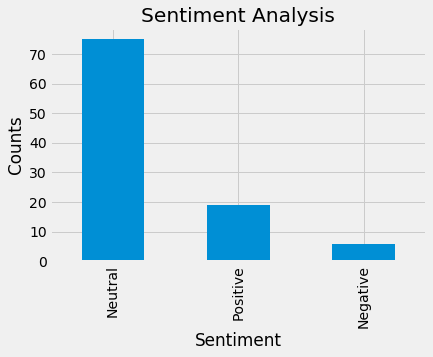

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()